# **Importation**

In [186]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data split
from sklearn.model_selection import train_test_split
#encondage des donnees
from sklearn.preprocessing import LabelEncoder
# Standarisation des donnees
from sklearn.preprocessing import StandardScaler
# detection des outliers
from datasist.structdata import detect_outliers
#imblance data
from imblearn.over_sampling import SMOTE

# machine learning model 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# evaluation de model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# enrengistrement de model
import pickle

# 1 -  **EDA (Data Exploration)**

In [187]:
df = pd.read_csv('titanic.csv')

In [188]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [190]:
df.shape

(418, 12)

In [191]:
df.duplicated().sum()

0

In [192]:
df.dtypes.value_counts()


int64      5
object     5
float64    2
dtype: int64

In [193]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [194]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [195]:
( df.isna().sum() / df.shape[0] * 100)


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<Axes: >

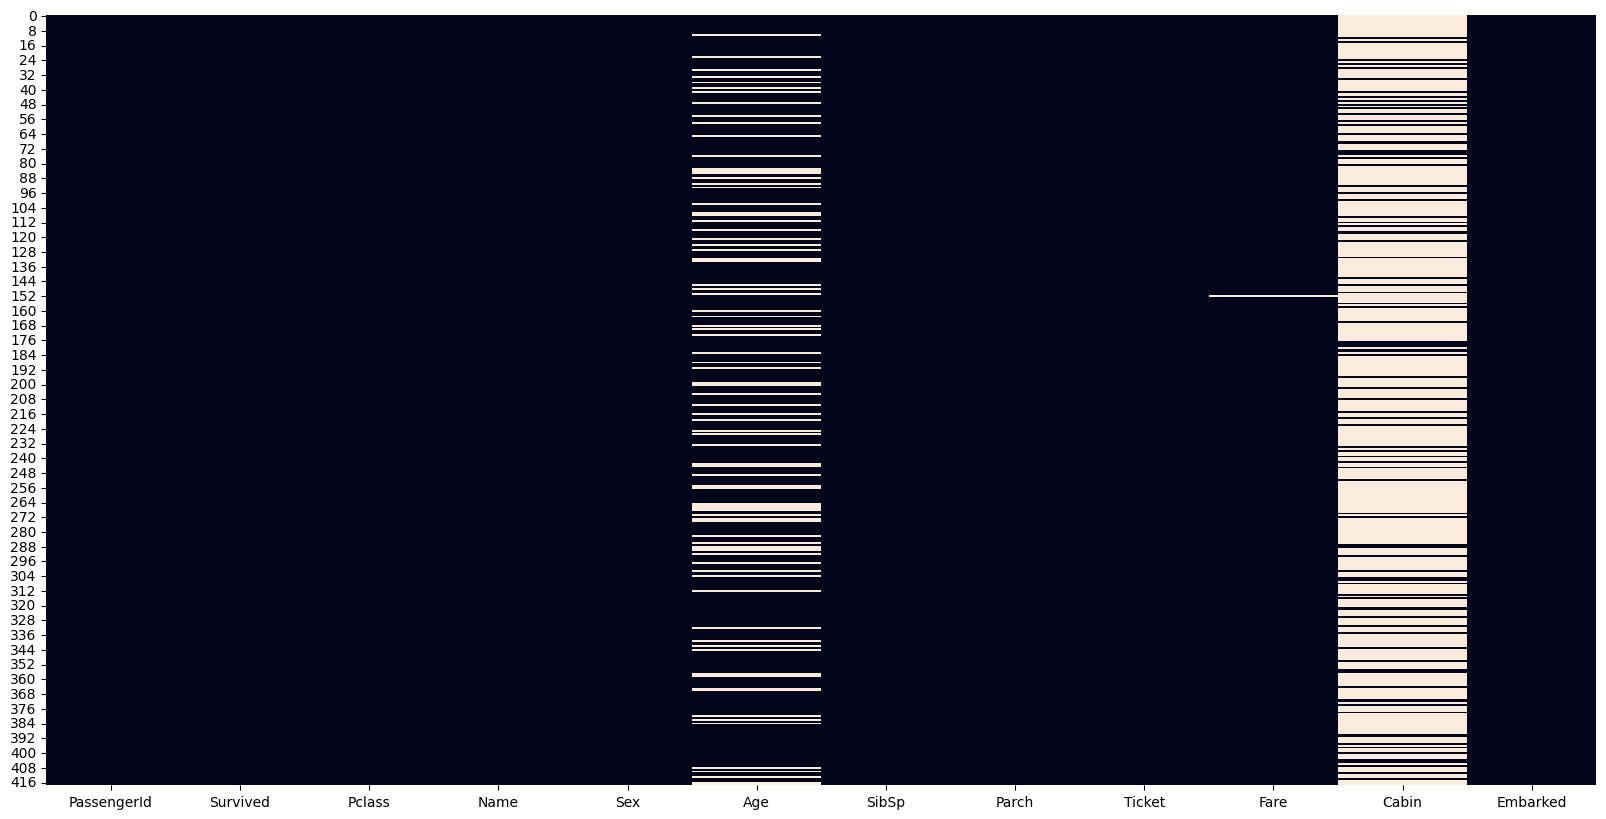

In [196]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [197]:
for review in df['Survived'].unique():
    print(review)

0
1


In [198]:
for review in df['Pclass'].unique():
    print(review)

3
2
1


In [199]:
for review in df['Sex'].unique():
    print(review)

male
female


In [200]:
for review in df['Age'].unique():
    print(review)

34.5
47.0
62.0
27.0
22.0
14.0
30.0
26.0
18.0
21.0
nan
46.0
23.0
63.0
24.0
35.0
45.0
55.0
9.0
48.0
50.0
22.5
41.0
33.0
18.5
25.0
39.0
60.0
36.0
20.0
28.0
10.0
17.0
32.0
13.0
31.0
29.0
28.5
32.5
6.0
67.0
49.0
2.0
76.0
43.0
16.0
1.0
12.0
42.0
53.0
26.5
40.0
61.0
60.5
7.0
15.0
54.0
64.0
37.0
34.0
11.5
8.0
0.33
38.0
57.0
40.5
0.92
19.0
36.5
0.75
0.83
58.0
0.17
59.0
14.5
44.0
5.0
51.0
3.0
38.5


In [201]:
for review in df['SibSp'].unique():
    print(review)

0
1
2
3
4
5
8


In [202]:
for review in df['Ticket'].unique():
    print(review)

330911
363272
240276
315154
3101298
7538
330972
248738
2657
A/4 48871
349220
694
21228
24065
W.E.P. 5734
SC/PARIS 2167
233734
2692
STON/O2. 3101270
2696
PC 17603
C 17368
PC 17598
PC 17597
PC 17608
A/5. 3337
113509
2698
113054
2662
SC/AH 3085
C.A. 31029
C.A. 2315
W./C. 6607
13236
2682
342712
315087
345768
1601
349256
113778
SOTON/O.Q. 3101263
237249
11753
STON/O 2. 3101291
PC 17594
370374
11813
C.A. 37671
13695
SC/PARIS 2168
29105
19950
SC/A.3 2861
382652
349230
348122
386525
349232
237216
347090
334914
F.C.C. 13534
330963
113796
2543
382653
349211
3101297
PC 17562
113503
359306
11770
248744
368702
2678
PC 17483
19924
349238
240261
2660
330844
A/4 31416
364856
29103
347072
345498
F.C. 12750
376563
13905
350033
19877
STON/O 2. 3101268
347471
A./5. 3338
11778
228414
365235
347070
2625
C 4001
330920
383162
3410
248734
237734
330968
PC 17531
329944
2680
2681
PP 9549
13050
SC/AH 29037
C.A. 33595
367227
392095
368783
371362
350045
367226
211535
342441
STON/OQ. 369943
113780
4133
2621
349226
3

In [203]:
for review in df['Parch'].unique():
    print(review)

0
1
3
2
4
6
5
9


In [204]:
for review in df['Fare'].unique():
    print(review)

7.8292
7.0
9.6875
8.6625
12.2875
9.225
7.6292
29.0
7.2292
24.15
7.8958
26.0
82.2667
61.175
27.7208
12.35
7.225
7.925
59.4
3.1708
31.6833
61.3792
262.375
14.5
61.9792
30.5
21.6792
31.5
20.575
23.45
57.75
8.05
9.5
56.4958
13.4167
26.55
7.85
13.0
52.5542
29.7
7.75
76.2917
15.9
60.0
15.0333
23.0
263.0
15.5792
29.125
7.65
16.1
13.5
7.725
21.0
7.8792
42.4
28.5375
211.5
25.7
15.2458
221.7792
10.7083
14.4542
13.9
7.775
52.0
7.7958
78.85
7.8542
55.4417
8.5167
22.525
7.8208
8.7125
15.0458
7.7792
31.6792
7.2833
6.4375
16.7
75.2417
15.75
7.25
23.25
28.5
25.4667
46.9
151.55
18.0
51.8625
83.1583
nan
12.1833
31.3875
7.55
13.775
7.7333
22.025
50.4958
34.375
8.9625
39.0
36.75
53.1
247.5208
16.0
69.55
32.5
134.5
10.5
8.1125
15.5
14.4
227.525
25.7417
7.05
73.5
42.5
164.8667
13.8583
27.4458
15.1
65.0
6.4958
71.2833
75.25
106.425
30.0
7.8875
27.75
136.7792
9.325
17.4
12.7375
0.0
20.2125
39.6
6.95
81.8583
41.5792
45.5
9.35
93.5
14.1083
7.575
135.6333
146.5208
211.3375
79.2
15.7417
7.5792
512.3292
63.3583
51

In [205]:
for review in df['Embarked'].unique():
    print(review)

Q
S
C


In [206]:
for review in df['Name'].unique():
    print(review)

Kelly, Mr. James
Wilkes, Mrs. James (Ellen Needs)
Myles, Mr. Thomas Francis
Wirz, Mr. Albert
Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Svensson, Mr. Johan Cervin
Connolly, Miss. Kate
Caldwell, Mr. Albert Francis
Abrahim, Mrs. Joseph (Sophie Halaut Easu)
Davies, Mr. John Samuel
Ilieff, Mr. Ylio
Jones, Mr. Charles Cresson
Snyder, Mrs. John Pillsbury (Nelle Stevenson)
Howard, Mr. Benjamin
Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)
del Carlo, Mrs. Sebastiano (Argenia Genovesi)
Keane, Mr. Daniel
Assaf, Mr. Gerios
Ilmakangas, Miss. Ida Livija
Assaf Khalil, Mrs. Mariana (Miriam")"
Rothschild, Mr. Martin
Olsen, Master. Artur Karl
Flegenheim, Mrs. Alfred (Antoinette)
Williams, Mr. Richard Norris II
Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
Robins, Mr. Alexander A
Ostby, Miss. Helene Ragnhild
Daher, Mr. Shedid
Brady, Mr. John Bertram
Samaan, Mr. Elias
Louch, Mr. Charles Alexander
Jefferys, Mr. Clifford Thomas
Dean, Mrs. Bertram (Eva Georgetta Light)
Johnston, Mrs. Andrew G 

In [207]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


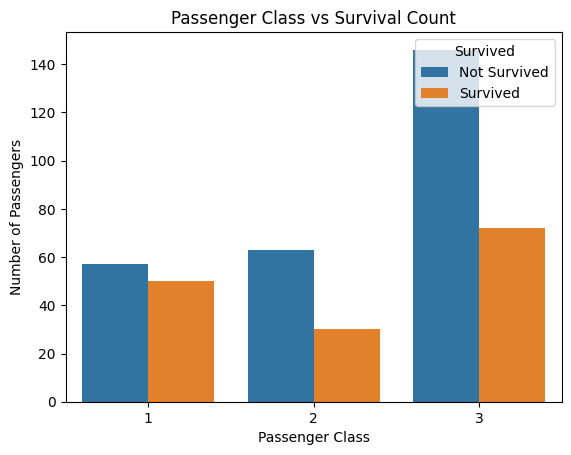

In [208]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


In [209]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,1.0
1,male,0.0


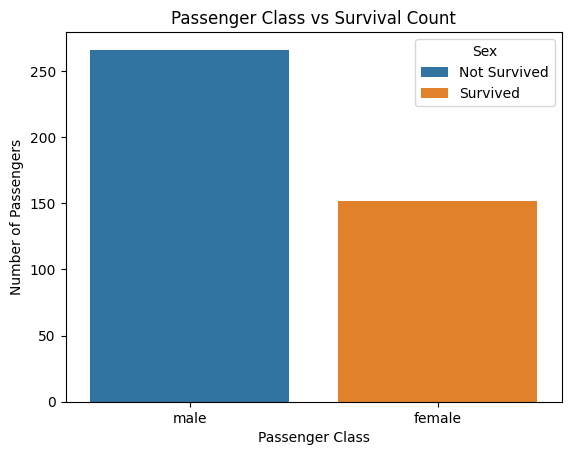

In [210]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

In [211]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


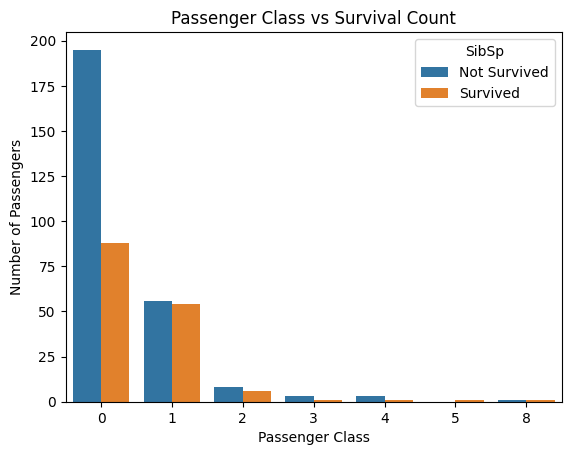

In [212]:
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='SibSp', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

In [213]:
df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Parch',ascending=True)

,Parch,Survived
0,0,0.305556
1,1,0.538462
2,2,0.606061
3,3,0.666667
4,4,1.000000
5,5,0.000000
6,6,0.000000
7,9,0.500000


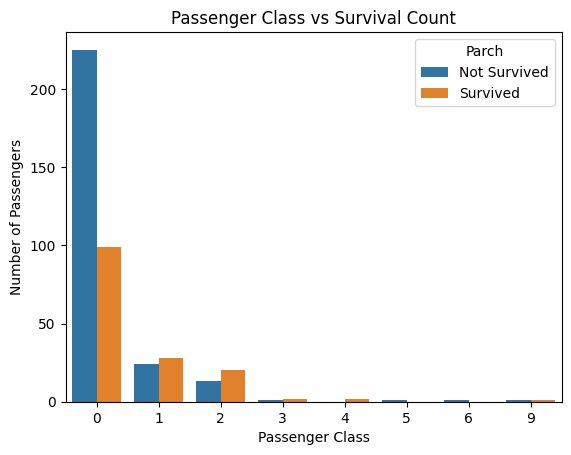

In [214]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Parch', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

In [215]:
df[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Age',ascending=True)


,Age,Survived
0,0.17,1.000000
1,0.33,0.000000
2,0.75,0.000000
3,0.83,0.000000
4,0.92,1.000000
...,...,...
74,62.00,0.000000
75,63.00,0.500000
76,64.00,0.666667
77,67.00,0.000000


In [216]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

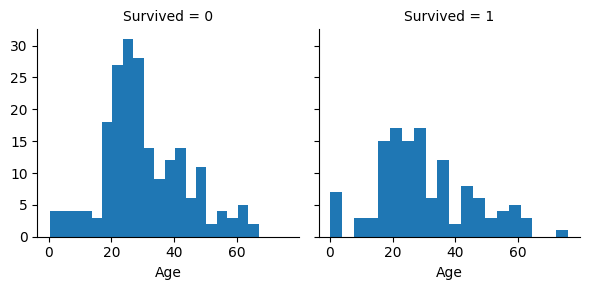

In [217]:
# hna rah ye3tina histogram te3 age li 3achou w li matou 
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

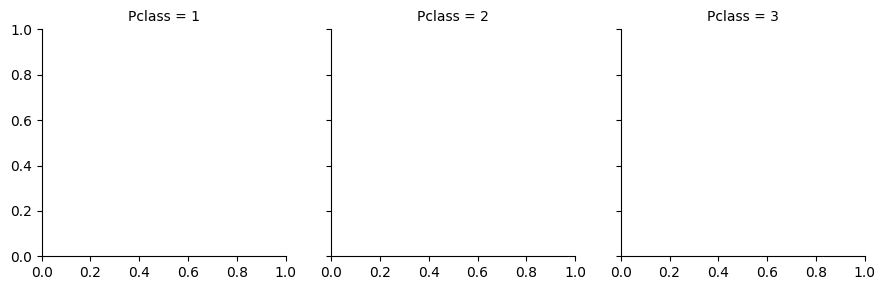

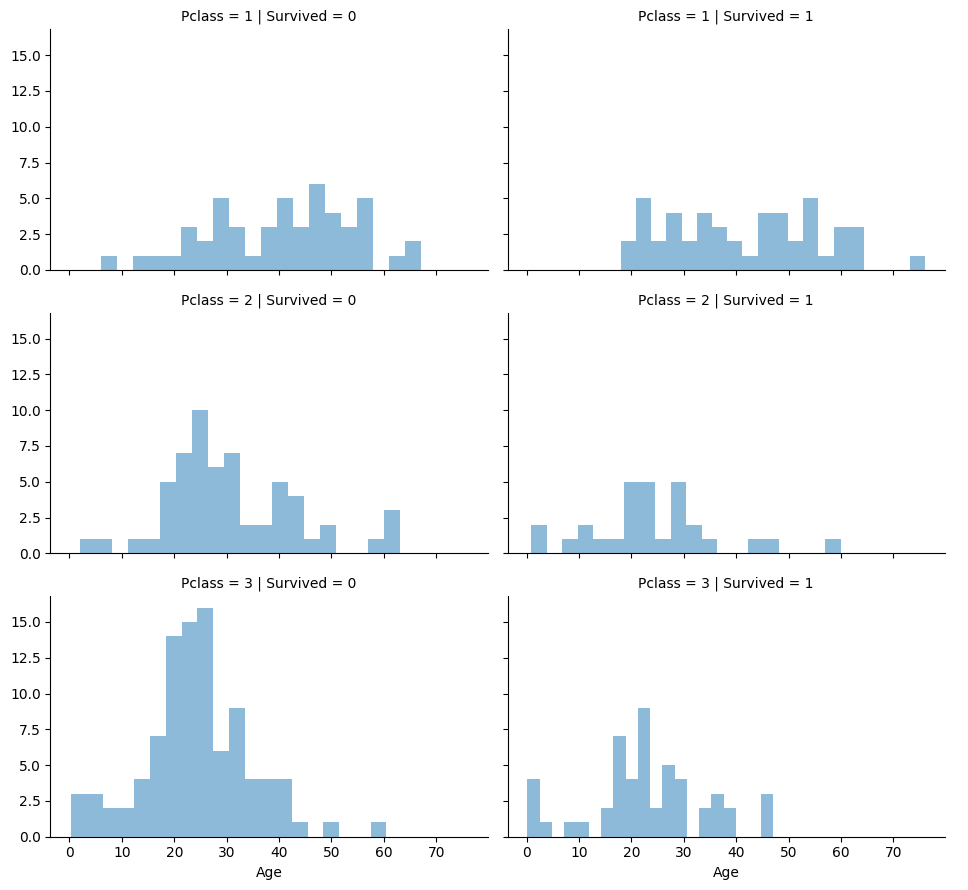

In [218]:
grid = sns.FacetGrid(df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\HP\anaconda3\Lib\site-pack

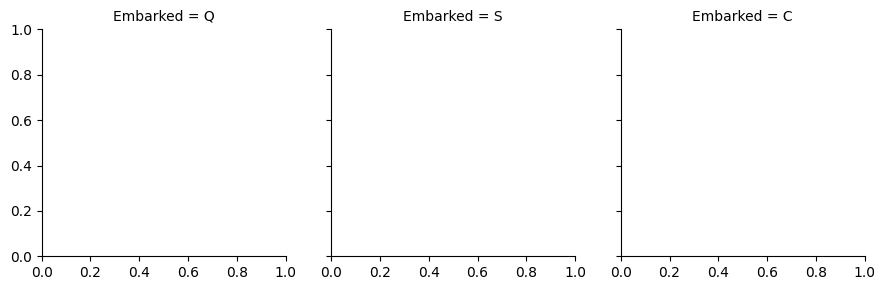

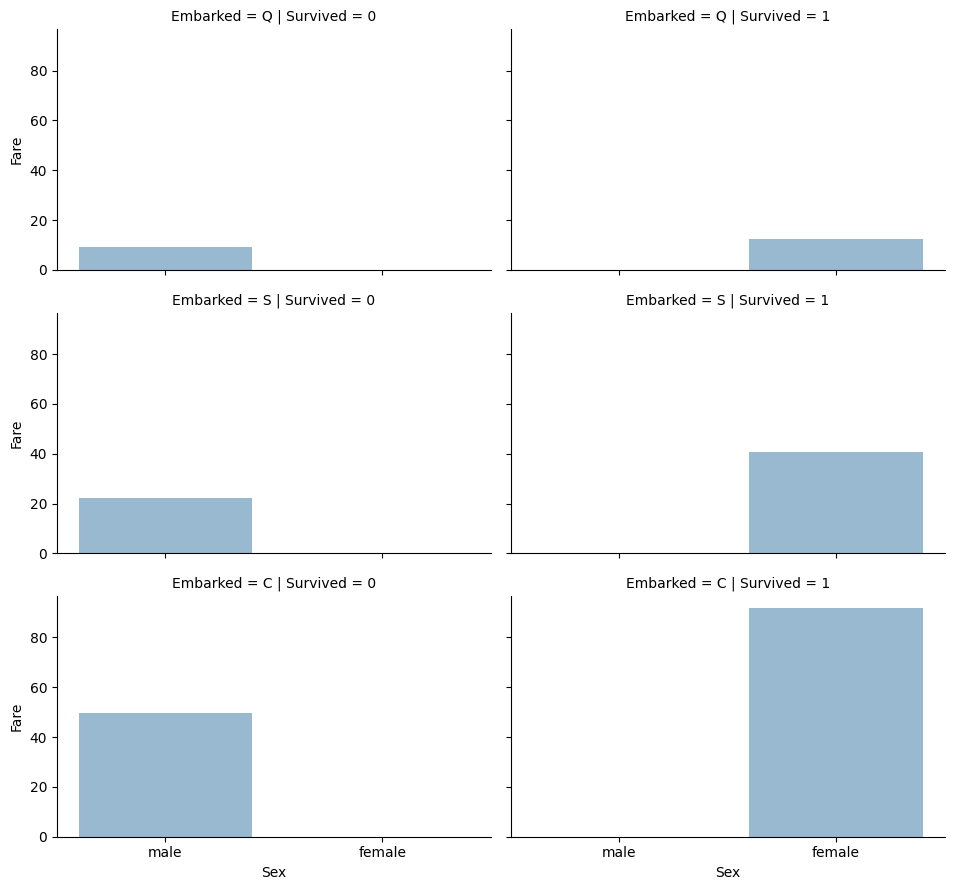

In [219]:
grid = sns.FacetGrid(df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [221]:
# Create a new column 'FamilySize' by adding 'SibSp' and 'Parch' and adding 1 to account for the person themselves
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Group by 'FamilySize' and calculate the mean survival rate
family_survival = df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Display the result
family_survival

,FamilySize,Survived
3,4,0.714286
5,6,0.666667
2,3,0.526316
7,8,0.500000
8,11,0.500000
1,2,0.486486
4,5,0.285714
0,1,0.268775
6,7,0.250000


In [222]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


# Feature engineering

In [223]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

is_alone_survival = df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
is_alone_survival


,IsAlone,Survived
0,0,0.509091
1,1,0.268775


In [224]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0


# hadi mnich sur nkhaliha

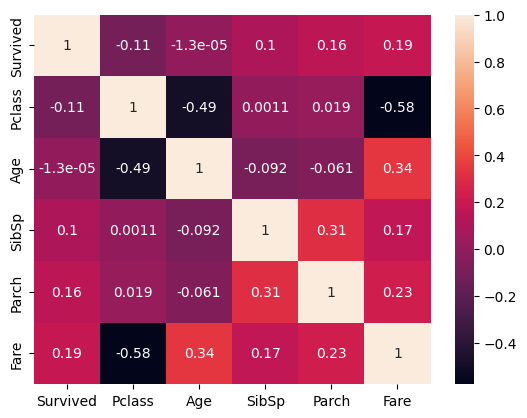

In [225]:
numerical = ['Survived', 'Pclass','Age','SibSp','Parch','Fare']

corr_matrix = df[numerical].corr()

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 2- **Prepocessing**

# droping unuse columns

In [226]:
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)
df = df.drop('Embarked', axis=1)
df = df.drop('Cabin',axis=1)
df = df.drop('FamilySize',axis =1)

In [227]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,IsAlone
0,892,0,3,male,34.5,0,0,7.8292,1
1,893,1,3,female,47.0,1,0,7.0000,0
2,894,0,2,male,62.0,0,0,9.6875,1
3,895,0,3,male,27.0,0,0,8.6625,1
4,896,1,3,female,22.0,1,1,12.2875,0


# handling with missing value

In [228]:
imputer = SimpleImputer(strategy='most_frequent') 
df['Age'] = imputer.fit_transform(df[ ['Age'] ])
df['Fare'] = imputer.fit_transform(df[ ['Fare'] ])



In [229]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
IsAlone        0
dtype: int64

# handling with outliers

<Axes: xlabel='PassengerId'>

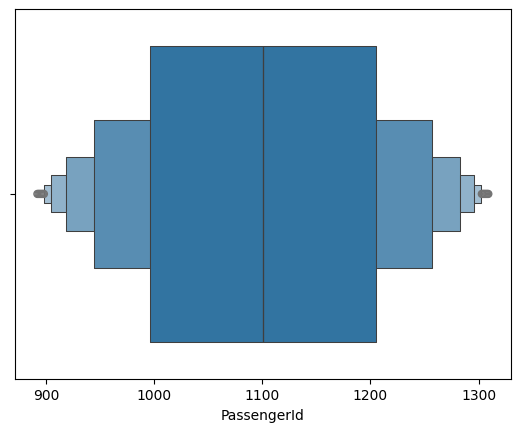

In [230]:
sns.boxenplot(x='PassengerId', data = df)

<Axes: xlabel='Age'>

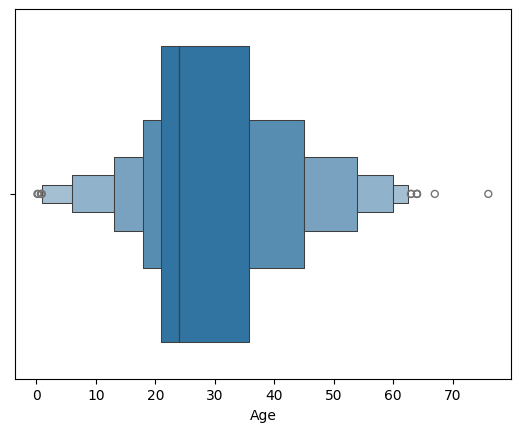

In [231]:
sns.boxenplot(x='Age', data = df)

<Axes: xlabel='Fare'>

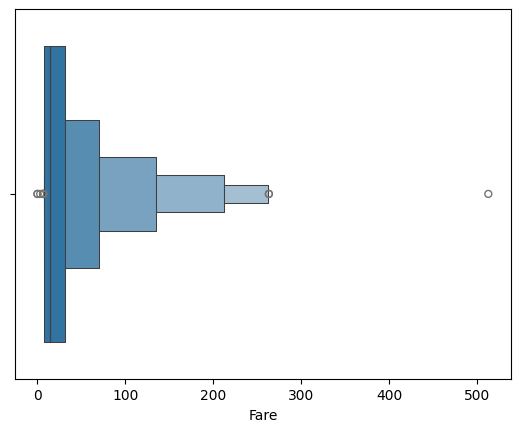

In [232]:
sns.boxenplot(x='Fare', data = df)

In [233]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    outliers = detect_outliers(df, 0, [col])
    df.drop(outliers, inplace=True)
    print(f'Outliers detected and dropped in {col}: {len(outliers)}')


Outliers detected and dropped in PassengerId: 0
Outliers detected and dropped in Survived: 0
Outliers detected and dropped in Pclass: 0
Outliers detected and dropped in Age: 16
Outliers detected and dropped in SibSp: 11
Outliers detected and dropped in Parch: 79
Outliers detected and dropped in Fare: 37
Outliers detected and dropped in IsAlone: 45


# Econding Categorical data

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 416
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  230 non-null    int64  
 1   Survived     230 non-null    int64  
 2   Pclass       230 non-null    int64  
 3   Sex          230 non-null    object 
 4   Age          230 non-null    float64
 5   SibSp        230 non-null    int64  
 6   Parch        230 non-null    int64  
 7   Fare         230 non-null    float64
 8   IsAlone      230 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 18.0+ KB


In [235]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 416
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  230 non-null    int64  
 1   Survived     230 non-null    int64  
 2   Pclass       230 non-null    int64  
 3   Sex          230 non-null    int32  
 4   Age          230 non-null    float64
 5   SibSp        230 non-null    int64  
 6   Parch        230 non-null    int64  
 7   Fare         230 non-null    float64
 8   IsAlone      230 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 17.1 KB


In [237]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,IsAlone
0,892,0,3,1,34.5,0,0,7.8292,1
3,895,0,3,1,27.0,0,0,8.6625,1
5,897,0,3,1,14.0,0,0,9.2250,1
6,898,1,3,0,30.0,0,0,7.6292,1
8,900,1,3,0,18.0,0,0,7.2292,1


# split the data

In [238]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [257]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8 ,test_size=0.20, random_state=90)

In [258]:
print(f"x: {x.shape}\ny: {y.shape}\n")
print(f"x_train: {x_train.shape}\nx_test: {x_test.shape}\n\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

x: (230, 8)
y: (230,)

x_train: (184, 8)
x_test: (46, 8)

y_train: (184,)
y_test: (46,)


In [259]:
print(len(x_train))

184


In [260]:
y_train.value_counts()

0    137
1     47
Name: Survived, dtype: int64

In [242]:
#sammpler = SMOTE(random_state=80)
#x_train, y_train = sammpler.fit_resample(x_train, y_train)

In [243]:
#y_train.value_counts()

# Feature Scaling

In [244]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# 3- **Build the Model**

In [245]:
models = {
    "LR": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
}

In [246]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------\n')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(
        f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}\n')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
    print(classification_report(y_test, y_pred))
    print('*'*50, '\n')

Training Model LR 
--------------

Training Accuracy: 1.0
Testing Accuracy: 1.0

Testing Confusion Matrix: 
[[36  0]
 [ 0 10]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        10

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

************************************************** 

Training Model KNN 
--------------

Training Accuracy: 1.0
Testing Accuracy: 1.0

Testing Confusion Matrix: 
[[36  0]
 [ 0 10]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        10

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

************************************

#  Final  model

In [247]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Accuracy: 1.0
Testing Accuracy: 1.0


# Save the model

In [248]:
with open('model.pkl', 'wb') as model_file: 
    pickle.dump(model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# **Tester Prediction**

In [249]:
y_pred = model.predict(x_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [250]:
sub = pd.read_csv('submission.csv')

In [251]:
print(len(sub))
print(len(y_pred))



418
184


In [252]:
sub['Survived'] = y_pred

ValueError: Length of values (184) does not match length of index (418)

In [ ]:
sub.head()